In [1]:
import math
import numpy as np
import numpy.random as nprand
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def error_heatmap(B):
    fail = np.arange(B+1)
    test = np.arange(B+1)
    data = np.zeros((B+1,B+1))
    for k in fail:
        for m in test:
            if (k < m):
                data[k,m] = 0.0
            else:
                data[k,m] = math.factorial(k)/float(math.factorial(k - m)) * math.factorial(B-m)/float(math.factorial(B))
    return data

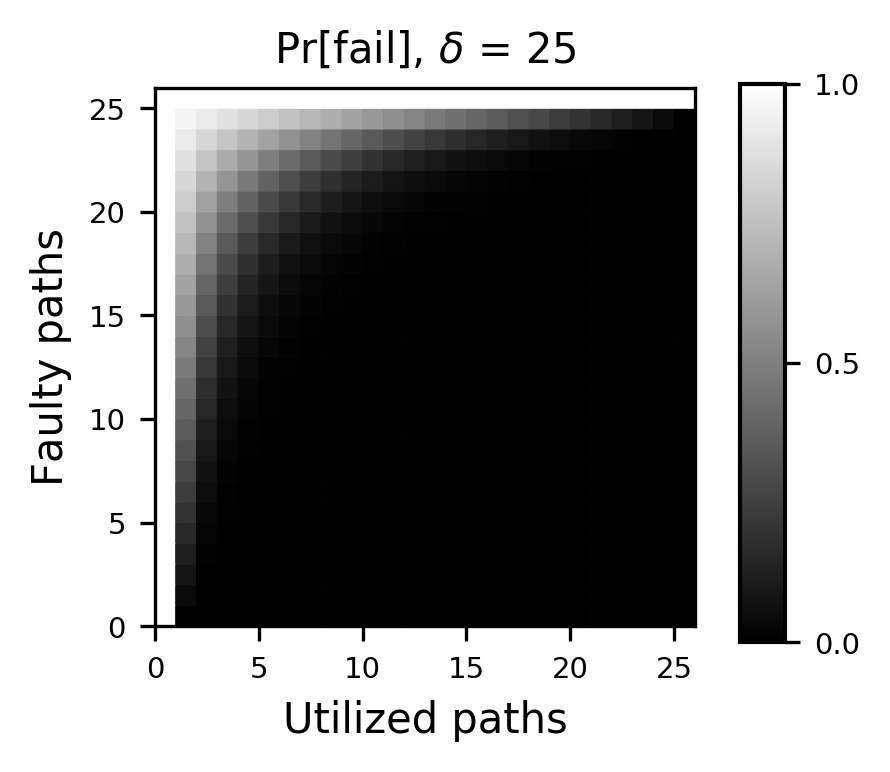

In [9]:
bg_color = "white"
fg_color = "black"
n = 25
fig = plt.figure(figsize=(3,2.66), dpi=300, facecolor=bg_color)
ax_main = plt.subplot(1,1,1)
im = ax_main.pcolor(error_heatmap(n), cmap="gray", edgecolor="face")
ax_main.set_title("Pr[fail], $\delta$ = %d" % n, fontsize=10, color=fg_color)
ax_main.set_xlabel("Utilized paths", color=fg_color, fontsize=10)
ax_main.set_ylabel("Faulty paths", color=fg_color, fontsize=10)
ax_main.set_xlim([0,n+1])
ax_main.set_ylim([0,n+1])
fig.subplots_adjust(left=0.2, right=0.8, wspace=0.45, hspace=0.7, bottom=0.2, top=0.875)
ax_bar = fig.add_axes([0.85, 0.18, 0.05, 0.7])
plt.tick_params(
    axis="x",
    which="both",
    bottom="off",
    top="off",
    labelbottom="off")
cb = fig.colorbar(im, cax=ax_bar, ticks=[0.,0.5,1.0])
cb.outline.set_edgecolor(fg_color)
cb.outline.set_linewidth(1)
cb.patch.set_facecolor(bg_color)
for ax in (ax_main, ax_bar):
    ax.tick_params(labelsize=10, color=fg_color)
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
        item.set_fontsize(10)
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(8)
    ax.patch.set_facecolor(bg_color)
    ax.tick_params(which="both", labelsize=7,colors=fg_color)
    ax.patch.set_facecolor(bg_color)
    ax.tick_params(which="both", labelsize=7,colors=fg_color)
    for spine in ax.spines.values():
        spine.set_color(fg_color)
plt.savefig("output/fig-perror-%d.pdf" % n, dpi=300, facecolor=bg_color)
plt.savefig("output/fig-perror-%d.eps" % n, dpi=300, facecolor=bg_color)

In [4]:
n = [5, 10, 25, 40]
rows = 2
cols = 2
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(4.5,4), dpi=300)
for ni, ax in enumerate(axes.flat):
    im = ax.pcolor(error_heatmap(n[ni]), cmap="gray", edgecolor="face")
    ax.set_title("P[failure], B = %d" % n[ni], fontsize=12)
    ax.set_xlabel("Utilized paths")
    ax.set_ylabel("Faulty paths")
    ax.set_xlim([0,n[ni]+1])
    ax.set_ylim([0,n[ni]+1])
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
        item.set_fontsize(10)
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(8)
fig.subplots_adjust(left=0.125, right=0.8, wspace=0.45, hspace=0.7, bottom=0.1, top=0.925)
ax = fig.add_axes([0.90, 0.625, 0.015, 0.3])
ax.tick_params(labelsize=10)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(12)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(8)
fig.colorbar(im, cax=ax, ticks=[0.,0.5,1.0])
plt.savefig("output/fig-perror.pdf", dpi=300)
plt.savefig("output/fig-perror.eps", dpi=300)

In [5]:
axes.flat